# Métricas

El presente notebook tiene como tema principal las métricas usadas para validar el desempeño de algoitmos de Clasificación y Regresión. Se mostrarán ejemplos sencillos para exponer el funcionamiento e importancia de cada uno, de igual forma las fuentes serán indicadas en cada apartado de modo que pueda accesarce a mayor información.

![Matriz_Confusion](Imagenes/rules.gif)

## Métricas usadas en algoritmos de Clasificación

### Matriz de Confusión

Por definición una matriz de confusión C es equivalente a $C_{ij}$. Esta matriz se puede traducir como el número de observaciones de una clase conocida i y que son predichas por el algoritmo de clasificación como j. El caso más sencillo es cuando se tiene una única clase:

![Matriz_Confusion](Imagenes/Matriz_Conf.png)


Al tener una única clase, el problema pasa a ser, de detección correcta o incorrecta. En la imagen anterior P simboliza que en la muestra existe la clase, mientras que N corresponde a la ausencia de la clase en la muestra. Con esto tenemos la comparación de lo que se espera el algoritmo de como resultado (*Actual class*) y lo que se obtiene de él (*Predicted class*).

De igual manera se introducen 4 terminos importantes para el tema de clasificación:

* Falsos Positivos o *Fauls Positives* (FP): Estas son predicciones que dieron positivas cuando en realidad eran negativas (No es deseado)
* Falsos Negativos o *Fauls Negatives* (FN): Estas son predicciones que dieron negativas cuando en realidad eran positivos (No es deseado)
* Verdaderos Positivos o *True Positives* (TP): Estas son predicciones que dieron positivas cuando en realidad **si** eran positivas (Es deseado)
* Verdaderos Negativos o *True Negatives* (TN): Estas son predicciones que dieron negativas cuando en realidad **si** eran negativos (Es deseado)

Con una sola clase es bastante intuitivo, no obstante se vuelve ligeramente más complejo; por ejemplo cuando se tienen 3 o más clases. En estos casos se puede obtener también que porcentaje de otras clases influyen entre si, y de este modo definir cuales clases tienen mayor relación entre ellas. Se dará un ejemplo para dejar un poco más claro este escenario.

**Ejemplo**

Se usará la libreria de sklearn "confusion_matrix", más información se puede encontrar en:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

De igual manera, el ejemplo original se puede encontrar en la pagina de sklearn: 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

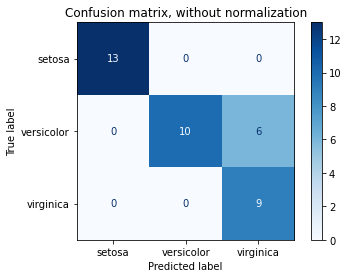

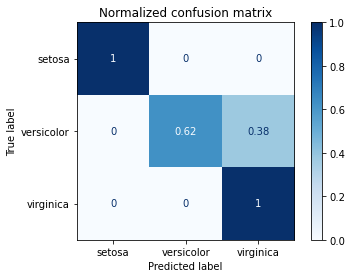

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

#Se hará uso del dataset Iris de flores, en este se incluyen tres clases
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Division de datos, sin hacer cross-compilation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Se usa el algoritmo C-Support Vector Classification, con el hiperparamentro C
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

# Imprime las matrices de confusion, normalizadas y no normalizadas
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

En este ejemplo sencillo nos ayuda a ver que en el caso de la clasifiación de flores versicolor se clasifica **erroneamete** como virginica en un 38%, no obstante, este fenomeno no ocurre en dirección contraria, teniendo una clasificación perfecta en los casos de setosa y virginica. 

### Accuracy, Precision, Recall y F-score

Teniendo en cuenta los conceptos de TP, FP y FN que se mencionan anteriormente se extraen los conceptos de:
* **Precision**:  Corresponde a la probabilidad de que una detección positiva corresponda a un Verdadero Positivo. En otras palabras, es la proporción de positivos de una clase, que en realidad corresponden a esa clase. El calculo se realiza mediante la siguiente ecuación. Esta medida es excluyente e individual por clase y no considera los FP.
<center>
$ Precision = \frac{TP}{TP + FP}$
</center>


* **Recall**: Esta  m ́etrica  nos  dice  que  porcentaje  del  total  delas  observaciones  que  posee  una  clase  fueron  detectadas.  El calculo se realiza mediante la siguiente ecuación. Esta medida es excluyentee individual por clase y no considera los FP.
<center>
$ Recall = \frac{TP}{TP + FN} $
</center>


* **Accuracy**: Esta métrica es similar al *recall* pero incluye todos los parametros de la matriz de confusión. Se refiere al número de predicciones correctas sobre el total de predicciones realizadas. El resultado caracteriza al modelo completo, incluyendo todas las clases y se calcula mediante las siguientes ecuaciones.

<center>
$ Accuracy(y_{true}, y_{pred}) = \frac{1}{n_{samples}} \sum_{i = 0}^{n_{samples} - 1}{1(y_{true} = y_{pred})}$

</center>


<center>
$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$
<\center>


Se recomienda usar esta métrica cuando se tiene una cantidad balanceada de datos por clase. Por ejemplo si el problema de de clasificación de imágenes de manzana y naranjas y se tiene una cantidad igual de imágenes por clase. 

* **F-score**: Para facilitar la visualización del *recall* y el *precision* se tiene el F-score que es una relación entre los dos mencionados. El cálculo de esta se realiza con la siguiente ecuación y al igual que las variables que relaciona el F-score es excluyente e individual para cada clase.

<center>
$ F-score = 2\cdot\frac{Recall\cdot Precision}{Recall + Precision} $
</center>



Este cálculo normalmente no es muy útil en muchas situaciones, como por ejemplo cuando el *precision* es muy alto en comparación con el *recall* el *F-score* se verá comprometido y no representará la realidad de la abstracción del modelo.

Para mayor información:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

La biblioteca sklearn da la opción de obtener todos estos datos simultaneamente, con el comando "classification_report". Si se desea ver más especificamente las méticas individuales, sklearn cuenta con otras funciones, como por ejemplo "accuracy_score()" que da el accuracy promedio de todo el modelo.

Para más información visitar la página:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#Se hará uso del dataset Iris de flores, en este se incluyen tres clases
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Division de datos, sin hacer cross-compilation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Se usa el algoritmo C-Support Vector Classification, con el hiperparamentro C
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

Pred_y = classifier.predict(X_test)
True_y = y_test
target_names = ['Setosa', 'Versicolor', 'Virginica']


report = classification_report(True_y, Pred_y, target_names=target_names)
print('\n')
print(report)

print("Accuracy del modelo: ", accuracy_score(True_y, Pred_y))



              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.62      0.77        16
   Virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38

Accuracy del modelo:  0.8421052631578947


Como era de esperar teniendo en cuenta la matriz de confusión, la métrica de precision de Virginica es bajo, ya que en una gran cantidad de casos se detecta como positivo en flores en las que no correspone, no obstante si se detectan todas las flores de Virginia, por lo que el recall es 1.

Esto se invierte en el caso de las Versicolor, en que no se logra detectar todas las que debería pero no tiene presencia de falsos positivos, por lo que el precision es 1.

### ROC curve y AUC

Estas métricas nos indican que tanto un algoritmo puede distinguir entre TP de TN en un modelo binario. Siendo una gráfica de TPR (Recall) vrs FPR, esta última no se ha definido aún, debido a que no es muy utilizada y está dado por la Ecuación:

<center>
$FPR = \frac{FP}{TN + FP}$
<\center>

La siguiente figura muestra los resultados de esta medición según la capacidad de un algoritmo de aproximar un modelo. 


![ROC](Imagenes/ROC.png)

En la figura a) representa un algoritmo que logra una clasificación perfecta, separando todos los TP de los TN. La figura b) muestra lo que ocurre cuando se da un cierto porcentaje de de FP y por ende FN. Por otra parte, la figura c) muestra un algoritmo que no logra hacer ninguna separación entre TP y TN, teniendo resultados meramente aleatorios.

Aunque la gráfica ROC es visualmente fácil de leer, el parámetro del área bajo la curva (AUC). es el parámetro utilizado para comparar el desempeño de diferentes algoritmos sobre un mismo dataset. En la figura se muestra como el caso ideal es un AUC cercano a 1, mientras que un AUC cercano a 0.5 es no deseado.

Para mayor información: 
https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/#:~:text=For%20example%2C%20a%20decision%20tree,of%20instances%20at%20the%20node.&text=The%20ROC%20curve%20shows%20the,corner%20indicate%20a%20better%20performance.

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

En el siguiente ejemplo se comparan dos modelos, para determinar cual es el que da los mejores resultados para el caso de ejemplo de cancer de detección de cancer de seno. Se usa un algoritmo SVC y también KNN.


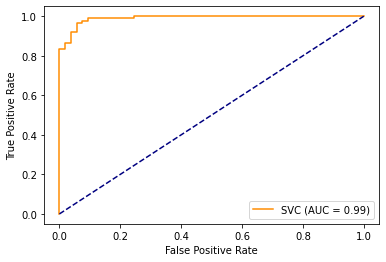

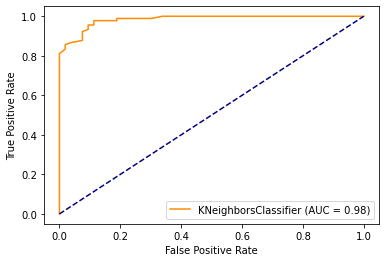

In [4]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm
from sklearn.neighbors import KNeighborsClassifier

Set = datasets.load_breast_cancer()
X = Set.data
y = Set.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
SVC = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
KNN = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)

metrics.plot_roc_curve(SVC, X_test, y_test, color='darkorange')  # doctest: +SKIP
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

metrics.plot_roc_curve(KNN, X_test, y_test, color='darkorange')  # doctest: +SKIP
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()                                   # doctest: +SKIP

Se obtiene como resultado que aunque ambos logran una generalización, el que da los mejores resultados es el SVC

## Métricas usadas en algoritmos de Regresión

### Max error

Esta métrica da como resultado el error residual máximo. En otras palabras, captura el error de la peor predicción dada por el modelo. Se intenta siempre que este error esté lo más cercano a cero posible. 

La siguiente ecuación caracteriza el funcionamiento de esta métrica. Con $y$ correspondiendo al valor esperado y $\overset{..}{y}$ el valor predicho por el modelo. Esta métrica se usa cuando es necesario que el modelo no supere un error establecido en ninguna muestra individual, aunque el error de MSE, MSLE u otros si esten bajo el límite deseado.

<center>
$Max Error(y,\overset{..}{y}) = max(|y - \overset{..}{y}|)$
<\center>

### Mean absolute error

Esta es una métrica ponderada que da la diferencia entre el valor real y el predicho en valor absoluto. Se calcula mediante la siguiente ecuación. Cabe destacar que MAE es un valor lineal, lo que significa que todos los errores individuales por predicción tienen el mismo peso en el resultado del calculo de la métrica. 

<center>
    $MAE = \frac{1}{n_{s}} \sum_{i = 0}^{n_{s} - 1}{|y_i - \overset{..}{y_i}|}$
<\center>

Por su naturaleza, con MAE las predicciones con un error muy grande no serán tan penalizadas como si lo hacen otras métricas que se discuten más adelante. En otras palabras, esta medida es usada cuando no es tan importante penalizar a los *outlayers*.

### Mean squared error

Esta es una métrica ponderada que da la diferencia cuadrática entre el valor real y el predicho en valor absoluto. Se calcula mediante la siguiente ecuación. Al ser un cálculo cuadrático este error penaliza los errores individuales grandes pero al mismo tiempo premia los errores individuales pequeños.

<center>
    $MSE = \frac{1}{n_{s}} \sum_{i = 0}^{n_{s} - 1}{(y_i - \overset{..}{y_i})^2}$
<\center>


Esta métrica es usada cuando es importante notar resultados con errores muy altos pero aislados, aunque no se suele usar para comparar el desempeño entre diferentes modelos.

### Median absolute error

Esta métrica nos da el valor de la mediana del error absoluto, esta medición no se ve alterada por los valores de lo *outlayers* a menos que haya muchos y es importante para determinar el error sobre el que oscila el modelo, aunque esto no implica que la mayoría de los errores sean este valor o cercano.

<center>
$MedAE(y,\overset{..}{y}) = median(|y_1 - \overset{..}{y_1}|,...,|y_n - \overset{..}{y_n}|)$
<\center>

### $R^2$ score, coefficient of determination

Teniendo un valor entre $-\infty$ y 1, esta métrica indica que tan bien las variables independientes en la regresión logran aproximar el resultado, siendo un 1 como una aproximación perfecta y cercano a cero como una predicción aleatoria. Este parámetro se calcula mediante la siguiente ecuación:

<center>
$R^2 = 1 - \frac{\sum_{i = 0}^{n}{(y_i - \overset{..}{y_i})^2}}{\sum_{i = 0}^{n}{(y_i - \overset{\_}{y_i})^2}}$
<\center>

Para más información:

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4

Para ejemplificar el uso de todas estas métricas se usa la base de datos **boston house-prices** que al igual que en los casos anteriores los da la biblioteca *sklearn*. El objetivo es predecir valor de viviendas de entre 5 mil y 50 mil dolares. Se confeccionan 4 modelos de regresión usando diferentes algoritmos.

In [5]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import mean_squared_log_error, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, ensemble
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Load the diabetes dataset
dataset = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=54)

#Compile model
regr = ensemble.AdaBoostRegressor(n_estimators = 12)
regr.fit(X_train, y_train)    #Train
y_pred = regr.predict(X_test) #Test

# The mean squared error
print('1) AdaBoost Regression')

print('Max error: %.2f' % max_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Median absolute error: %.2f' %median_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print()

#-------------------
#Compile model
regr = tree.DecisionTreeRegressor()
regr.fit(X_train, y_train)    #Train
y_pred = regr.predict(X_test) #Test

# The mean squared error
print('2) Decision Tree Regression')

print('Max error: %.2f' % max_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Median absolute error: %.2f' %median_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print()

#-------------------
#Compile model
kernel = DotProduct() + WhiteKernel()
regr   = GaussianProcessRegressor(kernel=kernel,random_state=0)
regr.fit(X_train, y_train)    #Train
y_pred = regr.predict(X_test) #Test

# The mean squared error
print('3) Gaussian Process Regression')

print('Max error: %.2f' % max_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Median absolute error: %.2f' %median_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print()

#-------------------
#Compile model
regr = neighbors.KNeighborsRegressor(12)
regr.fit(X_train, y_train)    #Train
y_pred = regr.predict(X_test) #Test

# The mean squared error
print('4) KNN regression')

print('Max error: %.2f' % max_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Median absolute error: %.2f' %median_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print()

1) AdaBoost Regression
Max error: 10.50
Mean absolute error: 2.28
Mean squared error: 8.31
Median absolute error: 2.02
Coefficient of determination: 0.88

2) Decision Tree Regression
Max error: 13.40
Mean absolute error: 2.63
Mean squared error: 12.87
Median absolute error: 1.85
Coefficient of determination: 0.81

3) Gaussian Process Regression
Max error: 19.35
Mean absolute error: 3.28
Mean squared error: 22.03
Median absolute error: 2.27
Coefficient of determination: 0.68

4) KNN regression
Max error: 24.77
Mean absolute error: 3.99
Mean squared error: 34.21
Median absolute error: 2.77
Coefficient of determination: 0.50



* **AdaBoost:** Con esta aproximación se logra el mejor MAE en comparación con todos los otros algoritmos, además de que presenta el mejor MSE lo que implica que posee pocos *outliers* aunque no logra el mejor MAD. Finalmente posee un $R^2$ alto, lo que implica una buena generalización.

* **Decision Tree:** Este es el algoritmo que presenta el segundo mejor desempeño, después del AdaBoost. Es el que logra el mejor MAD pero como muestra el MSE presenta una cantidad más significativa de *outliers*. No obstante el $R^2$ es alto y esta aproximación es buena para generalizar el problema.
    
* **Gaussian Process:** Este modelo es el que en comparación con los dos anteriores presenta los mayores *outliers*, como se ve en los resutlados, el MAD y el MAE no son demasiado superiores a los de sus predecesores, pero el verdadero problema es el MSE, problema que se ve reflejado en el valor del $R^2$.
    
* **KKN:** Este es el algoritmo que tiene el peor desempeño reflejándose directamente en el $R^2$ teniendo un valor bajo y no aceptable para decir que el modelo logra una generalización.


## Conclusiones

Como se ve en los ejemplos y en la teoría, existen muchas métricas para determinar la efectividad de un modelo sobre otro para generalizar un problema; pero de igual manera, se observa como no existe un único parámetro que indique independientemente y con total certeza cual es el mejor algoritmo a utilizar.

Por lo contrario, se deben usar  diferentes combinaciones de métricas para poder llegar a conclusiones, y además se tiene que tener claro cual es el objetivo de la generalización del problema para saber cuales métricas se deben optimizar. 